"power_6m.csv" 파일을 불러와 다음 문제를 풀이하시오.

In [10]:
import pandas as pd
df = pd.read_csv("power_6m.csv")
df.head(2)

Date     Time pow_active pow_reactive pc_kitchen pc_laundry  pc_temp
0  2007-01-01  0:00:00       2.58        0.136          0          0      0.0
1  2007-01-01  0:01:00      2.552          0.1          0          0      0.0

### Q1. 날짜/시간 변수를 제외한 변수는 결측이 있다고 한다. 해당 변수들의 결측값을 특정 값으로 대치한 후 해당 변수들의 평균값을 계산하시오.
※ "Date"와 "Time"변수를 제외한 나머지 변수가 대상이다.  
※ 결측은 숫자를 제외한 나머지 전체로 간주한다.  
※ .isna()로 검출이 불가한 문자열 결측치가 있는 변수도 있다.  
※ 결측치는 .fillna() 메서드를 활용해서 직전 값으로 대치한다.  
※ 결측치를 대치한 데이터세트는 나머지 문제에서 풀이에 사용하시오.  
※ 결측치 대치는 다음 예시를 참고하시오.
![결측치 대치 예시](test_missing_fill.png)

In [11]:
df_check = df.loc[df["pow_active"].str.contains(pat = "[^0-9.]"), ]
df_check["pow_active"].unique()

array(['?'], dtype=object)

In [12]:
df = df.replace("?", pd.NA)
for n_col in range(2, 7):
    df.iloc[:, n_col] = df.iloc[:, n_col].fillna(method = "ffill").astype("float")
    
df.iloc[19834:19838, ]

C:\Users\encai\AppData\Local\Temp\ipykernel_14596\1902579949.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, n_col] = df.iloc[:, n_col].fillna(method = "ffill").astype("float")


Date      Time  pow_active  pow_reactive  pc_kitchen  pc_laundry  \
19834  2007-01-14  18:34:00       3.252         0.288         0.0         0.0   
19835  2007-01-14  18:35:00       3.222         0.312         0.0         0.0   
19836  2007-01-14  18:36:00       3.222         0.312         0.0         0.0   
19837  2007-01-14  18:37:00       3.204         0.202         0.0         0.0   

       pc_temp  
19834     17.0  
19835     16.0  
19836     16.0  
19837     17.0

In [13]:
df.iloc[:, 2:].mean()

pow_active      1.155304
pow_reactive    0.124930
pc_kitchen      1.313206
pc_laundry      1.646459
pc_temp         5.747901
dtype: float64

### Q2. 일별 pow_active의 평균을 사용하여 단순 선형회귀분석을 실시하시오. 그리고 회귀 계수를 확인하시오.
※ Q1에서 결측치를 대치한 데이터를 사용하시오.  
※ 학습에 사용되는 데이터의 행 개수는 181이다.  
※ 독립변수는 0부터 180까지의 정수가 있다. (0: 2017-01-01, 180: 2017-06-30)  
※ statsmodels라이브러리를 사용하여 회귀분석을 실시하시오.  
※ 정답은 반올림하여 소수점 넷째 자리까지 표기하시오.  
(정답 예시: 0.1234)

In [16]:
df_agg = df.groupby("Date")["pow_active"].mean()
df_agg = df_agg.reset_index().reset_index()
df_agg.head(2)

index        Date  pow_active
0      0  2007-01-01    1.909031
1      1  2007-01-02    0.881414

In [17]:
df_agg.tail(2)

index        Date  pow_active
179    179  2007-06-29    0.905863
180    180  2007-06-30    0.927301

In [19]:
from statsmodels.formula.api import ols
model = ols(formula = "pow_active ~ index", data = df_agg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pow_active   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     57.04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.11e-12
Time:                        17:10:41   Log-Likelihood:                -119.16
No. Observations:                 181   AIC:                             242.3
Df Residuals:                     179   BIC:                             248.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6098      0.070     23.136      0.000       1.472       1.747
index         -0.0050      0.001     -7.552      0.000      -0.006      -0.004
==============================================================================
Omnibus:                        7.353   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.058
Skew:                           0.448   Prob(JB):                       0.0293
Kurtosis:                       3.365   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
round(model.params["index"], 4)

-0.005

### Q3. Q2의 모델을 사용하여 예측을 해보고자 한다. 2007년 9월 1일의 pow_active의 예측값은 얼마일 것으로 판단되는가?
※ 정답은 반올림하여 소수점 넷째 자리까지 표기하시오.  
(정답 예시: 0.1234)

In [27]:
val_index = (pd.to_datetime("2007-09-01") - pd.to_datetime("2007-01-01")).days
val_index

243

In [29]:
model.predict(pd.DataFrame({"index": [val_index]}))

0    0.382728
dtype: float64

### Q4. 일별 자료를 기반으로 군집분석을 하고자 한다. 날짜 관련 변수를 제외한 나머지 변수를 일별 평균값을 산출하고 이를 k-means 군집분석을 실시하시오. 가장 크기가 큰 군집의 데이터는 몇 월의 데이터가 가장 많은가?
※ Q1에서 결측치를 대치한 데이터를 사용하시오.  
※ 군집분석 실시전에 Min-Max 정규화를 실시하시오.  
※ 군집 개수는 3개로 설정하시오.  
※ seed는 123으로 설정하시오.  
(정답 예시: 1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [33]:
df_day = df.drop("Time", axis = 1).groupby("Date").mean()
df_day.head(2)

pow_active  pow_reactive  pc_kitchen  pc_laundry   pc_temp
Date                                                                  
2007-01-01    1.909031      0.102893         0.0    0.244444  4.083333
2007-01-02    0.881414      0.132182         0.0    0.241667  4.556944

In [34]:
model_mm = MinMaxScaler().fit(df_day)
df_day_nor = model_mm.transform(df_day)
df_day_nor[:2, ]

array([[0.63945333, 0.20522563, 0.        , 0.02906929, 0.30139935],
       [0.22287028, 0.4155273 , 0.        , 0.02873895, 0.33635758]])

In [37]:
model_km = KMeans(n_clusters = 3, random_state = 123).fit(df_day_nor)

In [38]:
df_day["cluster"] = model_km.labels_
df_day = df_day.reset_index()

In [39]:
df_day.head(2)

Date  pow_active  pow_reactive  pc_kitchen  pc_laundry   pc_temp  \
0  2007-01-01    1.909031      0.102893         0.0    0.244444  4.083333   
1  2007-01-02    0.881414      0.132182         0.0    0.241667  4.556944   

   cluster  
0        0  
1        1

In [42]:
cluster_big = df_day["cluster"].value_counts().idxmax()
df_day_sub = df_day.loc[df_day["cluster"] == cluster_big, ]
df_day_sub.head(2)

Date  pow_active  pow_reactive  pc_kitchen  pc_laundry   pc_temp  \
0  2007-01-01    1.909031      0.102893    0.000000    0.244444  4.083333   
4  2007-01-05    1.884281      0.120246    1.029861    0.263194  5.279167   

   cluster  
0        0  
4        0

In [45]:
pd.to_datetime(df_day_sub["Date"]).dt.month.value_counts().idxmax()

5

### Q5. Q4에서 생성한 모델을 개선하고자 한다. 이를 위해 실루엣 분석을 통해 적절한 군집 개수를 판단하고자 한다. 군집 개수를 변화시켜가며 실루엣 점수를 계산한 결과를 토대로 몇 개의 군집이 가장 적절한지 자유롭게 기술하시오.
※ sklean 라이브러리의 silhouette_score() 함수를 사용하시오.  

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(df_day_nor, labels = model_km.labels_)

0.25224494354334587

In [49]:
s_scores = []
for n in range(3, 21):
    model_km = KMeans(n_clusters = n,
                      random_state = 123).fit(df_day_nor)
    s_score_sub = silhouette_score(df_day_nor, model_km.labels_)
    s_scores = s_scores + [s_score_sub]


<AxesSubplot:>

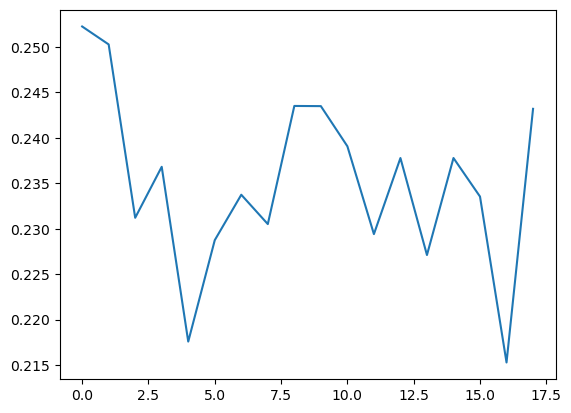

In [50]:
ser_s_scores = pd.Series(s_scores)
ser_s_scores.plot.line()

In [51]:
df_day_sub.head(2)

Date  pow_active  pow_reactive  pc_kitchen  pc_laundry   pc_temp  \
0 2007-01-01    1.909031      0.102893    0.000000    0.244444  4.083333   
4 2007-01-05    1.884281      0.120246    1.029861    0.263194  5.279167   

   cluster  month  
0        0      1  
4        0      1

In [53]:
df_day.loc[:, "pow_active":"cluster"].groupby("cluster").mean()

pow_active  pow_reactive  pc_kitchen  pc_laundry   pc_temp
cluster                                                            
0          1.220852      0.123423    1.520495    1.361158  6.891526
1          0.677294      0.114436    0.478609    0.789153  3.139935
2          1.963307      0.148725    2.533121    3.923708  8.540606